<a href="https://colab.research.google.com/github/alisha2501/Bike-Sharing-Demand-Prediction/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title :** Telecom Customer Churn

##**Problem Description**

In the highly competitive telecom industry, customer retention is crucial for sustaining profitability and growth. One of the major challenges faced by telecom companies is customer churn, where users discontinue their services. This project aims to address this issue by building a predictive model that can identify customers who are likely to churn.

##**Data Description**

The dataset contains customer demographic details such as gender, age, and senior citizen status, along with service usage patterns like internet service, phone service, and streaming preferences.This comprehensive data is used to predict whether a customer is likely to churn or not.

##**Attribute Information**

*   customerID – Unique ID assigned to each customer.
*   Gender – Gender of the customer (Male/Female).
*   SeniorCitizen – Indicates whether the customer is a senior citizen (1: Yes, 0: No).
*   Partner – Whether the customer has a partner (Yes/No).
*   Dependents – Whether the customer has dependents (Yes/No)
*   Tenure – Number of months the customer has stayed with the company.
*   PhoneService – Indicates if the customer has a phone service (Yes/No).
*   MultipleLines – Indicates if the customer has multiple lines (Yes, No, No phone service)
*   InternetService – Type of internet service provided (DSL, Fiber optic, No).
*   OnlineSecurity – Whether the customer has online security add-on (Yes, No, No internet service).
*   DeviceProtection – Whether the customer has device protection (Yes, No, No internet service).
*   TechSupport – Whether the customer has tech support service (Yes, No, No internet service).
*   StreamingTV – Whether the customer streams TV (Yes, No, No internet service).
*   StreamingMovies – Whether the customer streams movies (Yes, No, No internet service).
*   Contract – Type of contract (Month-to-month, One year, Two year).
*   PaperlessBilling – Whether the customer uses paperless billing (Yes/No).
*   PaymentMethod – Method of payment (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
*   MonthlyCharges – The amount charged to the customer monthly.
*   TotalCharges – The total amount charged to the customer.
*   Churn – Target variable indicating whether the customer churned (Yes/No).

## **Business Goal**

The primary business goal is to reduce customer churn by identifying patterns and key factors that lead customers to discontinue telecom services. By building a predictive model to detect at-risk customers early, the company can take targeted retention actions, improve customer satisfaction, and enhance overall profitability.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
import pickle

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

## **Data Inspection**

In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.tail()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **Defining the required metric**

data description:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None the of the data points have null/missing values. The data type of these columns also seems to be correct. We are lucky to have been given such a clean a data-frame. From the first look, there is not much manipulation/cleaning required unlike most other data-sets.

## **Feature Engineering**

In [ ]:
df= df.drop(['customerID'], axis=1)

The 'customerID' column was removed as it serves as a unique identifier and does not contribute to the predictive modeling process.

In [ ]:
print(df["Gender"].unique())

['Female' 'Male']


In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)


Column: Gender
['Female' 'Male']
--------------------------------------------------
Column: SeniorCitizen
[0 1]
--------------------------------------------------
Column: Partner
['Yes' 'No']
--------------------------------------------------
Column: Dependents
['No' 'Yes']
--------------------------------------------------
Column: Tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Column: PhoneService
['No' 'Yes']
--------------------------------------------------
Column: MultipleLines
['No' 'Yes']
--------------------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Column: OnlineSecurity
['No' 'Yes']
--------------------------------------------------
Column: OnlineBackup
['Y

In [ ]:
df.isnull().sum()

,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df[df["TotalCharges"]==" "]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Manual,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Manual,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Manual,73.35,,No


The 'TotalCharges' column contains blank entries where 'tenure' is 0. Since 'TotalCharges' is expected to be the product of 'tenure' and 'MonthlyCharges', these blank values logically correspond to customers with no active tenure.

In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"]= df["TotalCharges"].replace(" ", 0)

In [ ]:
df["TotalCharges"]= df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Class distribution analysis

In [ ]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


The dataset exhibits class imbalance, which can negatively impact model performance. To address this, techniques such as oversampling the minority class or undersampling the majority class can be applied to achieve a more balanced class distribution.

## **Insights:**

1.   
Customer ID removed as it is not required for modelling
2.   No missing values in the dataset
3.   Missing values in the TotalCharges column were replaced with 0
4.  Class imbalance identified in the target


## **EDA**

In [ ]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The mean value of the 'SeniorCitizen' feature is closer to 0, indicating that the majority of customers in the dataset are not senior citizens.

In [ ]:
df.shape

(7043, 20)

Numerical Features Analysis

In [ ]:
def plot_histogram(df, columns):
  plt.figure(figsize=(5,3))
  sns.histplot(df[columns], kde=True)
  plt.title(f'Distribution of {columns}')
  col_mean= df[columns].mean()
  col_median= df[columns].median()
  plt.axvline(col_mean, color='r', linestyle='dashed', linewidth=1)
  plt.axvline(col_median, color='g', linestyle='dashed', linewidth=1)
  plt.legend()
  plt.show()
  # for i, column in enumerate(columns, 1):
  #   plt.subplot(2,3,i)
  #   df[column].hist()
  #   plt.title(column)

<ipython-input-23-e528d25055f0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


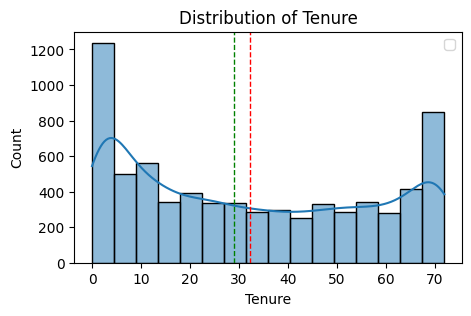

In [ ]:
plot_histogram(df,'Tenure')

<ipython-input-23-e528d25055f0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


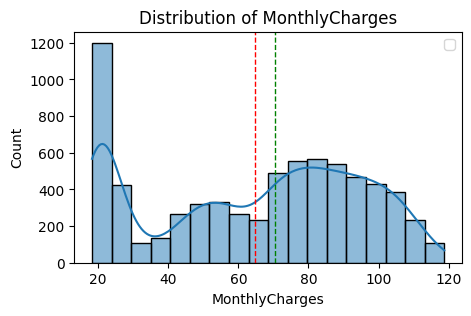

In [ ]:
plot_histogram(df,'MonthlyCharges')

<ipython-input-23-e528d25055f0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


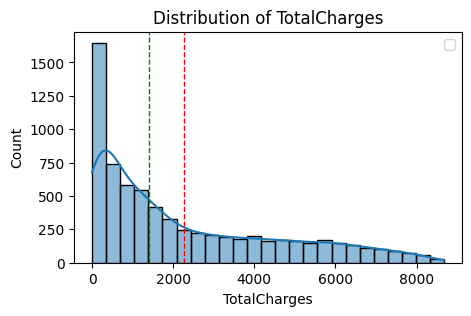

In [ ]:
plot_histogram(df,'TotalCharges')

The presence of right-skewed distributions suggests potential outliers on the higher end of the affected features

Working with skewed or non-uniform data is not ideal, as many machine learning algorithms assume features to be normally distributed. To address this, we will apply standard scaling to normalize the feature distribution.

In [ ]:
def box_plot(df, columns):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[columns])
  plt.title(f'Distribution of {columns}')
  plt.ylabel(columns)
  plt.show()

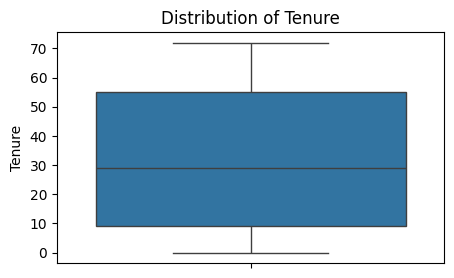

In [ ]:
box_plot(df,'Tenure')

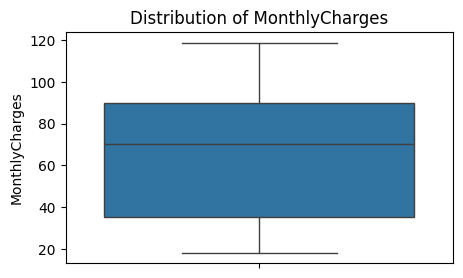

In [ ]:
box_plot(df,'MonthlyCharges')

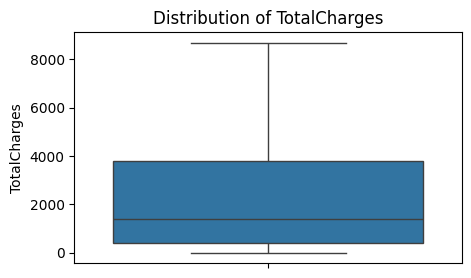

In [ ]:
box_plot(df,'TotalCharges')

no outliers

Correlation heatmap for numerical columns

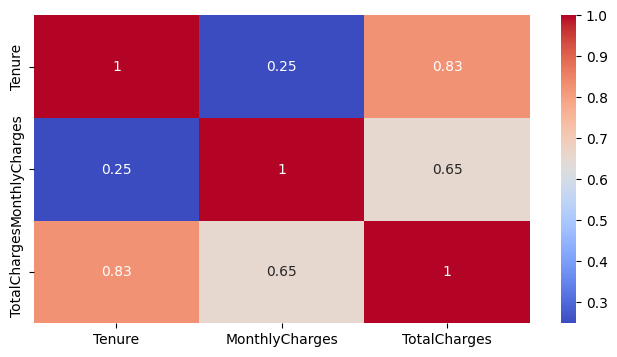

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["Tenure", "MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap='coolwarm')
plt.show()

Categorical features analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


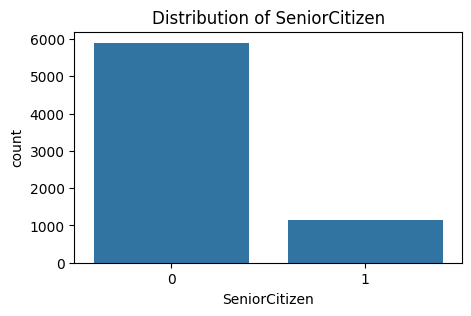

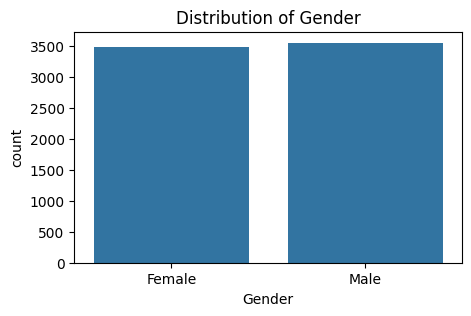

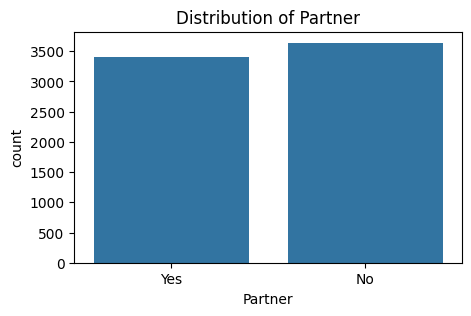

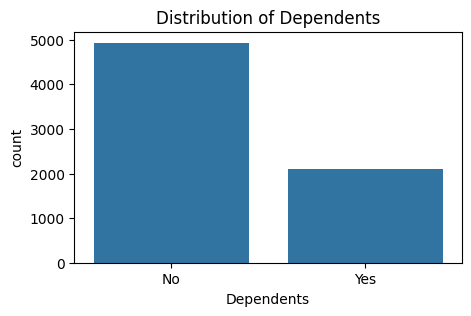

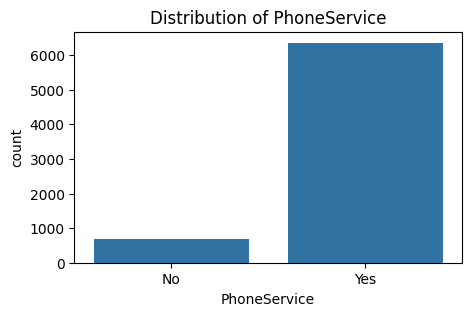

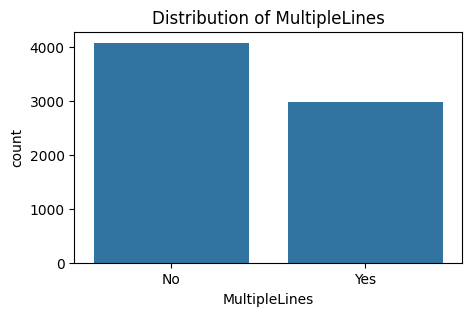

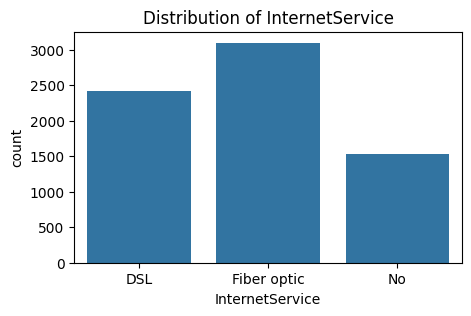

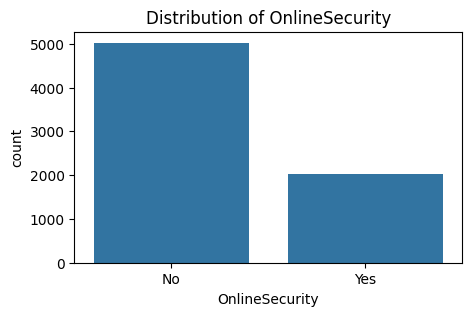

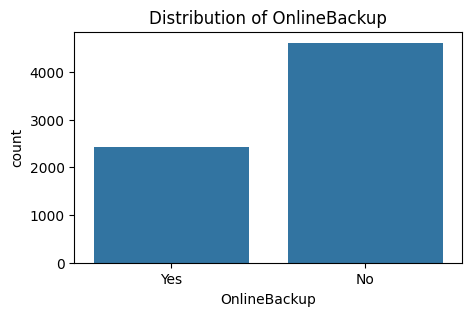

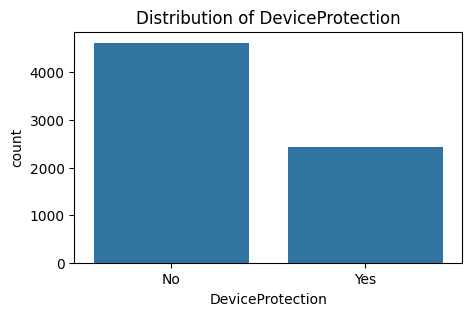

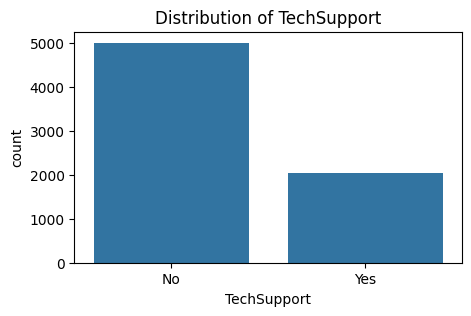

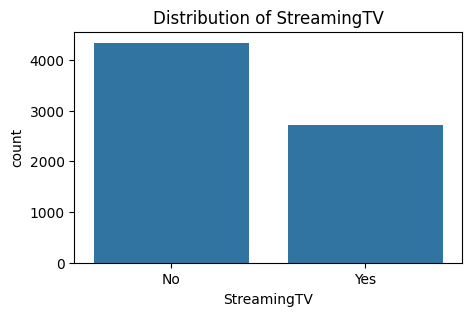

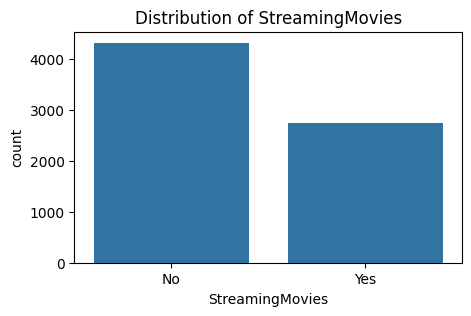

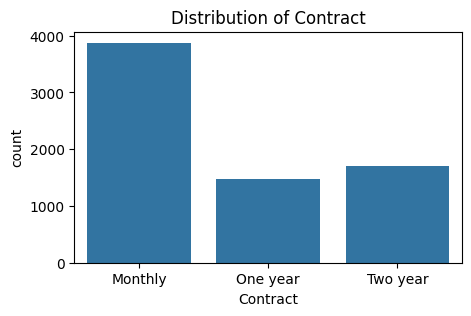

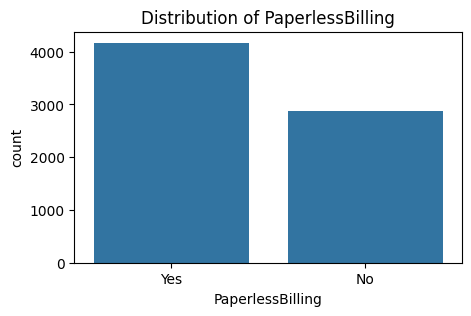

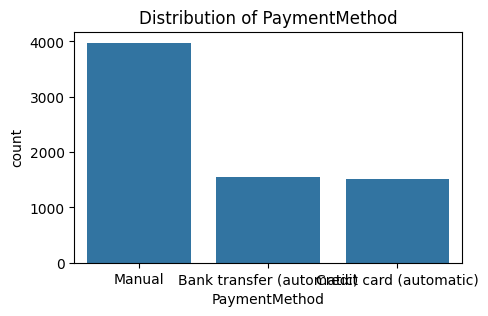

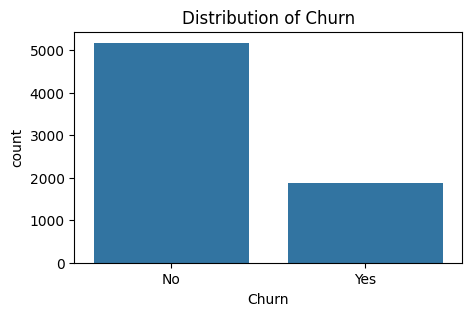

In [ ]:
object_cols= df.select_dtypes(include="object").columns.to_list()
object_cols= ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')
  plt.show()


## **Data Preprocessing**

In [ ]:
df.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes


Label Encoding of target column

In [ ]:
df["Churn"]= df["Churn"].replace({"Yes": 1, "No": 0})

<ipython-input-36-40827a3d6528>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]= df["Churn"].replace({"Yes": 1, "No": 0})


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label Encoding of categorical columns

In [ ]:
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
encoders= {}
for column in object_columns:
  label_encoder= LabelEncoder()
  df[column]= label_encoder.fit_transform(df[column])
  encoders[column]= label_encoder

  #save to a pickle file

  with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [ ]:
encoders

{'Gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
inin

##  **Training and test data split**

In [ ]:
X= df.drop(columns=["Churn"])
y= df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Due to the observed class imbalance in the target variable, we will apply the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to synthetically generate samples for the minority class and improve model performance.

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## **Hypothesis for Telecom Customer Churn:**

1. Customers with shorter tenure are more likely to churn than long-term customers.

2.  Customers on month-to-month contracts have higher churn rates compared to those on yearly or two-year contracts.

3.  Higher monthly charges may lead to increased churn probability.

4.  Senior citizens may have a higher tendency to churn due to service adaptability or cost concerns.

5. Customers who do not subscribe to tech support may experience unresolved issues, leading to higher churn.

6. Customers using fiber optic internet may churn more due to higher costs or performance issues compared to DSL.

7. Electronic check users may have higher churn compared to customers using auto payment methods.

8. Customers subscribing to multiple services (e.g., phone, internet, TV) are less likely to churn due to service bundling.

<Axes: >

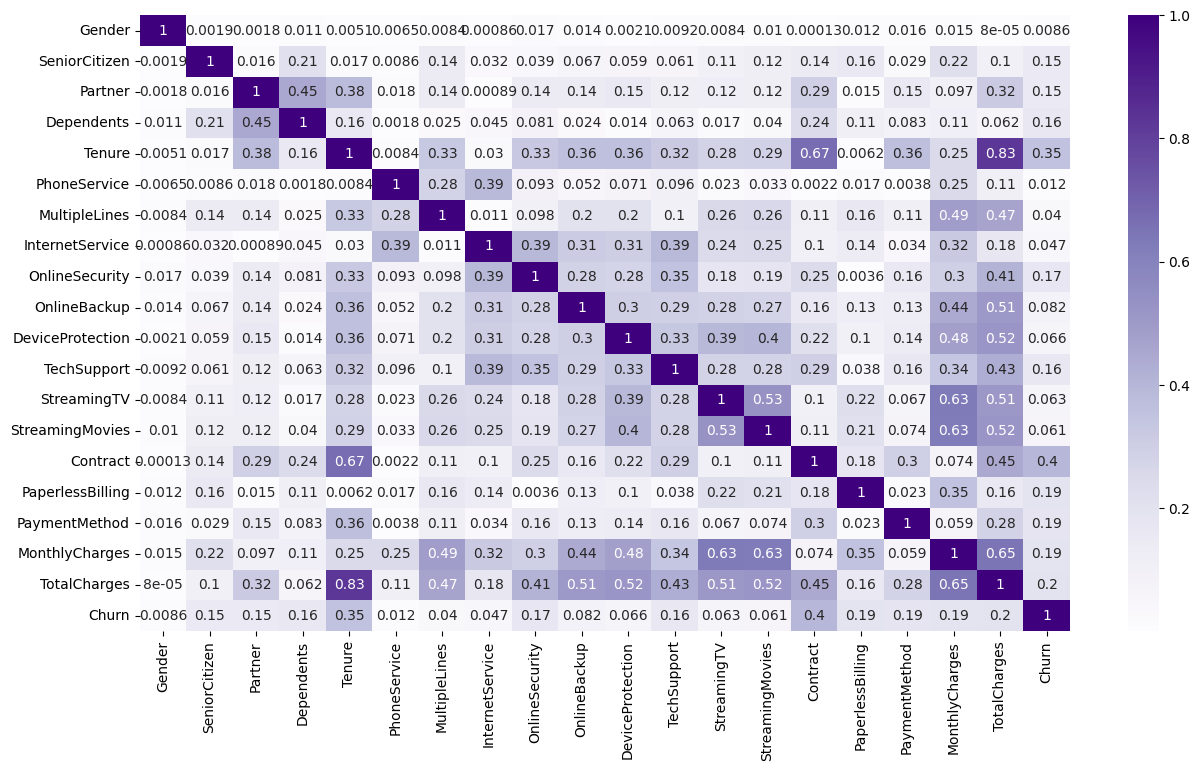

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, square=False, cmap='Purples')


## **Model Training**

training with default hyperparameters

In [ ]:
models= {
    # "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}


In [ ]:
cv_scores={}

for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.83
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68176329, 0.71903323, 0.80725076, 0.84592145, 0.84350453]),
 'Random Forest': array([0.73369565, 0.76555891, 0.89123867, 0.88459215, 0.89546828]),
 'XGBoost': array([0.71437198, 0.7510574 , 0.88519637, 0.88942598, 0.8978852 ])}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## **Model Evaluation**

In [ ]:
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7707594038325053
Confsuion Matrix:
 [[860 176]
 [147 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1036
           1       0.56      0.61      0.58       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



In [ ]:
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [ ]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


## **Conclusion**



Based on the experimental results, both XGBoost and Random Forest regressors achieved the highest cross-validation accuracy of 0.83, indicating strong performance among the tested algorithms. In contrast, the Decision Tree regressor had the lowest accuracy of 0.78, making it the least effective model in this comparison.